# Machine Learning and Statistics Assessment - Winter 2022
## Atlantic Technological University
## Author: Ross Downey (G00398275)
## Lecturer: Dr. Ian McLoughlin
***

This jupyter notebook contains a discussion on timeseries anomalies, and an example of the detection of such an anomaly from the keras website.
***

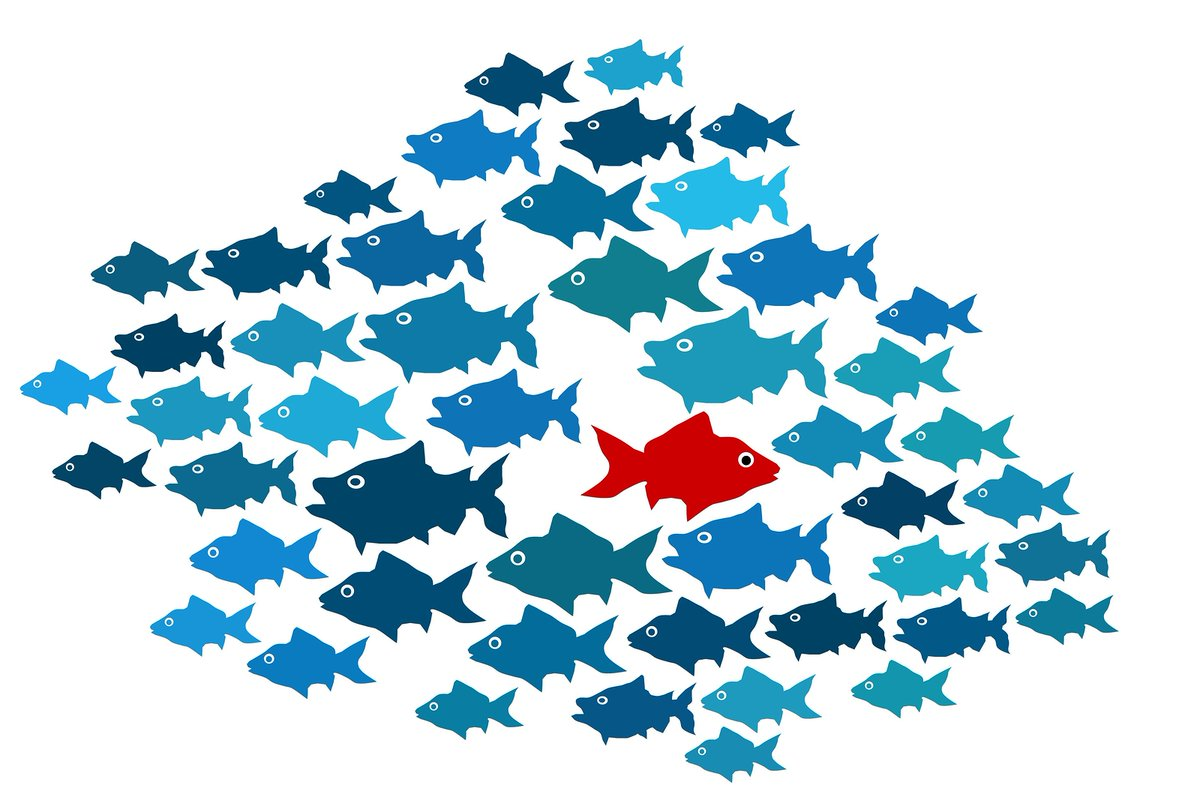

Anomaly detection is the identification of outliers, rare events or patterns in data. The identification of anomalies is crucial in the area of machine learning as the inclusion of these outliers can lead to inaccurate statistical models being created and implemented. <br>
Machine learning is applied in many facets of modern life, including medical diagnosis, facial recognition, digital assistant such as Amazon's ubuiquitous Alexa, and cyber security such as online banking, Paypal etc. From just these few examples it is clear that accurate, effective machine learning is a neccessity in day-to-day life. Should these models be constructed without considering possible anomalies in the data then there could be disastrous consequences, particularly in the areas of medicine and banking to name a few. <br>
In order for these statistical models to be created there needs to be a way in which outliers can be identified and omitted from the data. However, datapoints that may initially appear to be outliers, but are actually part of the dataset need to be included in order to apply successful machine learning. <br>
***

## Libraries
A number of libraries were required to be imported in order to create this notebook. <br>

## Numpy
![](../images/numpy.png)<br>
Numpy, or numerical Python, is a library used in Python to create different types of arrays or multi-dimensional matrices, and includes a large collection of mathematical functions to operate on these arrays.<br>

## Pandas
![](../images/pandas.png)<br>
Pandas is an open source library built for data analysis and manipulation in Python. <br>

## Matplotlib
![](../images/matplotlib.png)<br>
Matplotlib is a plotting library used in python to create visual plots from data.<br>

## Tensorflow
![](../images/tensorflow.jpg)<br>
Tensorflow is an open source library, built by Google, for use in artificial intelligence and machine learning.<br>

## Keras
![](../images/keras.png)<br>
Keras is a Python interface for using Tensorflow to help create machine learning functions and neural networks. <br>

In [1]:
# Efficient numerical arrays
import numpy as np

# Dataframes
import pandas as pd

# Plotting Library
from matplotlib import pyplot as plt

# Keras API for deep learning
from tensorflow import keras

# Used to add layers to a model for accurate construction
from tensorflow.keras import layers

***
The initial step in demonstrating this time-series anomaly example is an appropriate dataset. In this case the data set is taken from the "numenta" github repository which does contain some real world data with known anomalies, but in this example artificial data is taken. [6] <br>
The datasets used are called "daily_noise" and "daily_jumpsup" where some imagined data increases on a daily basis (over time) but on a certain day in the "jumps_up" data the increase is larger than the typical increase seen in the "noise" data, thus yielding an anomaly. This will be explained in greater detail further down the notebook.<br>
***

On the Keras website the code is imported using unclear code, which also contains confusing labels for the dataset variables which do not explicitly define what the datasets actually are.<br>
It was decided to clean the code and rename the variables in order to rectrify this for the end user. <br>
Variable names such as "small_noise" and "daily_jumpsup" were replaced with "no_anomaly" and "with_anomaly". <br>
This gives the end user a  clearer picture as which data is which on reading the code. <br>
The original variable names were subsequently kept to remain aligned with the original code but on initial <br>
importing this change was made. <br>
***

In [2]:
# Cleaner code for importing the dataset, define numenta site as a variable for importing the datasets
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [3]:
# Output urls to confirm correct dataset and for ease of checking the data.
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

The datasets can then be read into a pandas dataframe for use in the subsequent keras code. <br>
The dates are parsed for easier reading and the index column has been changed to time (timestamp column). <br>
Subsequently, the "head" function is used to print the first five values of the dataframe <br>
This can be compared with the values in the urls given above to ensure we have the correct values. <br>
Note that pandas did not import the data values with full precision in some cases but seems to have <br>
rounded all values to six decimal places. For the purposes of this notebook this won't have any impact. <br>
A quick statistical evaluation of the dataset has been performed using the "describe" function to <br>
give the reader basic statistical attributes. <br>
***

In [5]:
# read the data with no anomaly into a pandas dataframe
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
# First five values of dataset for sanity check
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [7]:
# Basic statistical analysis
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [8]:
# The shape of the dataset, 4032 values in one dimension
df_small_noise.shape

(4032, 1)

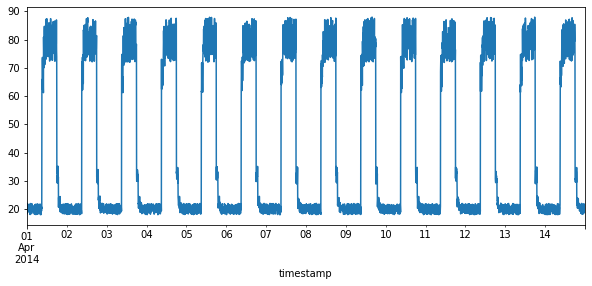

In [9]:
# Create plot for visual examination
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

The data from the anomalous dataset can also be imported in a similar fashion. <br>
***

In [10]:
# read the data with anomalies into a pandas dataframe also
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [11]:
# First five values of dataset for sanity check
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [12]:
# Basic statistical analysis
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [13]:
# The shape of the dataset, also 4032 values in one dimension
df_daily_jumpsup.shape

(4032, 1)

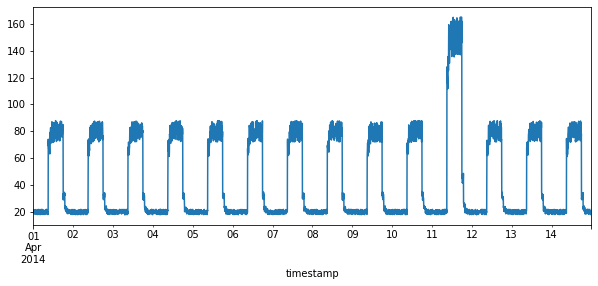

In [14]:
# Create plot for visual examination
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

***
The data from the noise set records imagined responses or values every five minutes from 01-Apr-2014, typically in the region of 20. The jumps_up set does the same thing but we know there are anomailies in this set (Just not seen in the first five datapoints). This data could be anything, air temperature, traffic volumes, ambient decibel levels, it is not necessary to know what the actual data is "recording", the important thing is that we have a noise set and another set with known anomalies to build our model. <br>
Assessing the statistical data show us that there is a difference between both datasets. <br>
The mean is slightly higher in the "jumps_up" dataset, the minimum value is essentially the same, <br>
but the max value is nearly twice as high in the "jumps_up" data.<br>
The standard deviation is also higher in the "jumps_up" data which indicates a greater spread of results.<br>


Human beings are visual creatures. It is estimated that approximately 65% of the population learn best through visual aids such as plot, graphs, images. [7] <br>
To make the data more readily absrbed by the reader is nearly always best to provide some sort of plot or graph.<br>
Note that the data is recorded over time, with time being on the x-axis. The responses, as seen above, are every five minutes. The data increases each day and decreases between each day. This plot gives a better indication of the data instead of the numerical values given previously. <br>

***
Comparing the data from the jumps_up data shows a similar plot but with one crucial difference. The data follows a similar pattern where the responses seen increase each day and subsequently decrease. However, the increase seen on the 11-Apr-2014 is approximately double the response seen on the other days. This is an obvious anomaly, and confimrs that the data can be used to build a model suitable for anomaly detection.

***
We now need to perform some statistical analysis on our noise data set so we can start to "train" the model appropriately. By training the model we mean to build the model with the noise data identified accurately. By identifying what is noise, the model can then subsequently identify what is an outlier and what is not.<br>
***

In [15]:
# Calculating mean and standard deviation for the noise dataset
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()

# Calculate z-score of training dataset 
df_training_vals = (df_small_noise - training_mean) / training_std

In [16]:
training_mean

value    42.438353
dtype: float64

In [17]:
training_std

value    28.077122
dtype: float64

In [24]:
# Confirming example values and shape remains the same (4032 points in one dimension)
df_training_vals.head(), df_training_vals.shape

(                        value
 timestamp                    
 2014-04-01 00:00:00 -0.858829
 2014-04-01 00:05:00 -0.728993
 2014-04-01 00:10:00 -0.848148
 2014-04-01 00:15:00 -0.729586
 2014-04-01 00:20:00 -0.731173,
 (4032, 1))

In [19]:
# Adding mead and standard deviation columns to dataframe
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [20]:
df_small_noise.head()

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173


***
The above code calculates the mean and standard deviation of the dataset, and subsequently the z-score (div_std). This, of course, presumes that the dataset is normally distributed. The initial plot of the noise dataset would indicate that the data is indeed normally distributed, as the data follows a certain pattern with no anomalies. <br>
The z-score is an important function when comparing datasets. By determining the z-score (labelled as "df_training_vals" above) we can determine how far each datapoint is from the mean, or how many standard deviations from the mean each response is. [8] The z-score can then be used on other datasets, in this case the jumps_up dataset, for comparison. This z-score calculation is called normalising the data in the documentation. [2] <br>

An example of the windows is now provided to make the next section clearer for the reader. <br>
A sliding window function is performed on the data to take overlapping sections of the dataset and split into parts. <br>
In the below example a simple array of 12 integers is taken and split into "windows"<br>
This will be done on the training dataset subsequently but visualising this makes it easier to understand the action performed <br>
on the training dataset.<br>

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [26]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5, 3, 5, 7, 3, 1, 6, 12, 7]
# Example window size.
win_size = 4
# Length of L.
len(L)

20

In [27]:
# Number of windows from L is calculated by subtracting the size of the window minus 1 from the length of the array.
# This gives us 17 windows of size 4 in an array of 20.
len(L) - (win_size - 1)

17

In [28]:
# Print the windows. Count 17 if you like...
# Note the window moves up one position on the array and takes 4 each time.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2, 4]
[1, 2, 4, 5]
[2, 4, 5, 6]
[4, 5, 6, 7]
[5, 6, 7, 1]
[6, 7, 1, 2]
[7, 1, 2, 3]
[1, 2, 3, 4]
[2, 3, 4, 5]
[3, 4, 5, 3]
[4, 5, 3, 5]
[5, 3, 5, 7]
[3, 5, 7, 3]
[5, 7, 3, 1]
[7, 3, 1, 6]
[3, 1, 6, 12]
[1, 6, 12, 7]


In [30]:
# Add the windows into one array
wins = []

# Generate the windows using for loop over each window
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2, 4],
 [1, 2, 4, 5],
 [2, 4, 5, 6],
 [4, 5, 6, 7],
 [5, 6, 7, 1],
 [6, 7, 1, 2],
 [7, 1, 2, 3],
 [1, 2, 3, 4],
 [2, 3, 4, 5],
 [3, 4, 5, 3],
 [4, 5, 3, 5],
 [5, 3, 5, 7],
 [3, 5, 7, 3],
 [5, 7, 3, 1],
 [7, 3, 1, 6],
 [3, 1, 6, 12],
 [1, 6, 12, 7]]

In [31]:
# The stack function then creates a 2D numpy array from the array of windows.
np.stack(wins)

array([[ 1,  1,  2,  4],
       [ 1,  2,  4,  5],
       [ 2,  4,  5,  6],
       [ 4,  5,  6,  7],
       [ 5,  6,  7,  1],
       [ 6,  7,  1,  2],
       [ 7,  1,  2,  3],
       [ 1,  2,  3,  4],
       [ 2,  3,  4,  5],
       [ 3,  4,  5,  3],
       [ 4,  5,  3,  5],
       [ 5,  3,  5,  7],
       [ 3,  5,  7,  3],
       [ 5,  7,  3,  1],
       [ 7,  3,  1,  6],
       [ 3,  1,  6, 12],
       [ 1,  6, 12,  7]])

The dataset is then broken up into sequences called "time_steps". The number 288 comes from a datapoint every five minutes for 24 hours. The dataset has now been split for each day it was recorded.<br>
***

In [ ]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

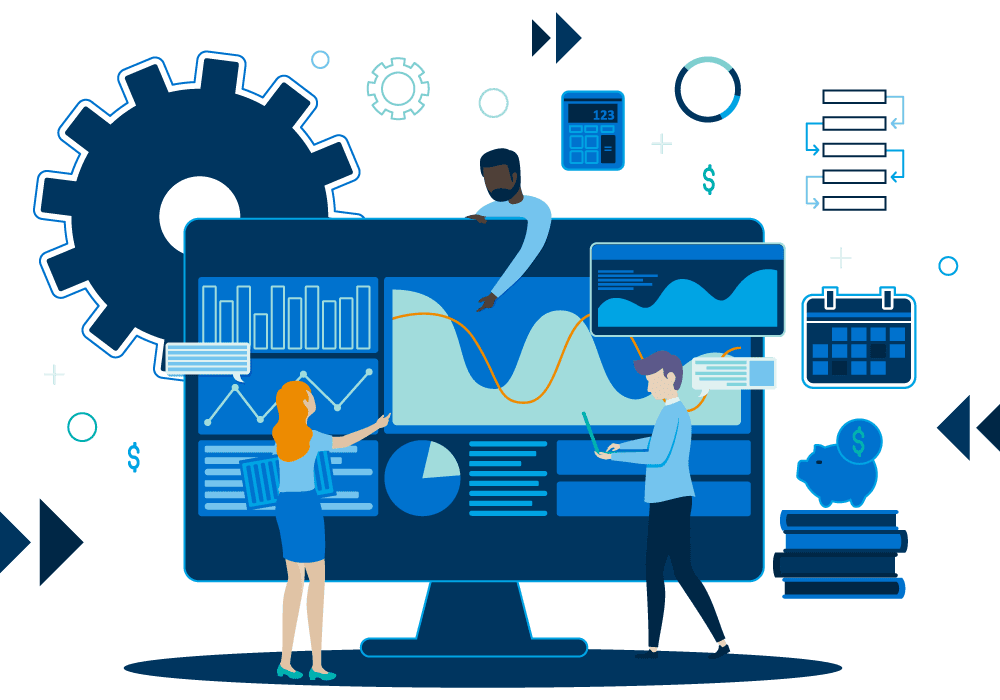

*** 
The code below starts to build the model needed to determine outliers. This is known as a "convolutional reconstruction autoencoder model" [2]. This means that the output of this data is rebuilt to form its input. The model is then trained to try to determine what is an outlier and what is not. 

In [ ]:
# Sequential is used for linear segments of data [1], this data is linear as only one observation made per timepoint
model = keras.Sequential(
    [
        # x_train is the variable given to the segments of data
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        # Conv1D as data is one-dimensional, one datapoint per timepoint
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        # Dropout helps prevent over-fitting of the data with random inputs of zero [1]
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

***
We now have a model based on two days worth of data (x_train[1] and x_train[2]). The model must be "trained" on the noise dataset. x-train is being used for inpiut and the target (entered twice below as a parameter) as this is a reconstrunction model. If it was not a reconstruction model then another input would be taken in, such as in classification models, or cluster models.<br>
***

In [ ]:
history = model.fit(
    x_train,
    x_train,
    # An epoch is a full training cycle of data, in this case 50 training cycles are being performed
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    # When the model stops improving then early stopping can be applied to prevent overfitting of the model
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

***
As stated previously, visual plots are the best way to display clearly what is happening. (A lot of code and numbers have been generated above, it is very easy to get lost and/or confused regarding what is happening). The plots below help to visualize what we have done.<br>
The training loss plot below is a plot of how well the model fits the training data we inputted. The validation loss plot is slightly different in that it takes a portion of the original data that was set aside in order to measure the actual performance of the model. Comparing the two plots gives an indication if the model was overfit or underfit. <br>
The plot below is a measure of the loss on the y-axis against the number of epochs on the x-axis. Both plots follow the same pattern, except for the initial epochs of the training loss (possibly due to x_train[1] and[2] being used to train the data?). <br>
The plots indicate that a well-fitting model has now been built on the noise dataset.<br>
***

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

***
Anomalies can now be detected by getting the model to rebuild the original data and comparing the reconstrucution to the original data. The re-created dataset should be able to accurately resemble the original data. [2]

In [ ]:
# MAE is the mean absolute error of the reconstructed data
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

# Plot for visual comprehension
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

***
The reconstruction error threshold outputted above is the largest mean absolute error when comparing the original dataset to the one reconstructed by the model. This threshold value is worst that the model performed when reconstructing the dataset. By taking this value as the level of what can be considered an anomaly we can then subsequent detect outliers with a degree of confidence. i.e. the model has detected a pattern that it considers out if trend. [2]


The plot below is a visual representation of the first day's datapoints. One plot is the original data, and the other is the data as reconstructed by the model. Both datasets appear to follow the same pattern, it should be noted however, that the original data appears to have a lot more random noise on the dataset compared to the predicitive model.<br>

In [ ]:
# Checking how the first sequence is learnt

# Adding colours to show which is which
plt.plot(x_train[0], 'b-')
plt.plot(x_train_pred[0], 'r-')
plt.show()

We now need to prepare the test data to run our model on. The test data will be analysed having previously determined what value would be considered an anomaly. <br>
First the dataset z-score values are plotted to show the pattern that the data takes. Then the data is broken up into sequences, with the mean absolute error being subsequently calculated for each.<br>
The anomaly threshold was previously calculated to be approx. 0.14. All MAE values that are over 0.14 are therefore consicered to be outliers. The histogram shows us that the majority of MAE values are just below 0.15 but there are some values seen above 0.45. These are the anomalies in the dataset and it appears that the model has identified them. The code then outputs the indices of these datapoints that are outliers as they are originally calculated on the MAE values so it is desirable to identify them on the original data instead.
***

In [ ]:
# Plot of test data, note calculation of datapoints minus the mean divided by std. dev. ie z-score
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values and output the shape of the x_test data after making the sequences
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss. *(Mean Absolute Error, between the predictive model and the dataset)
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

# Histogram to visually demonstrate the MAE loss for each sequence in the dataset
plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

As the data was originally broken up into sequences, timesteps, we have only identified sequences that are outliers and not the individual datapoints. Consequently, the code below is used to get the indvidual datapoint that is anomalous to the dataset. If three subsequent timesteps are an anomaly then the point common to all three is the outlier. <br>
***

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

We now create a plot of the original dataset with an overlaid plot of the anomalies as calculated by the model. This is visual confirmation of the success of the model where the anomalies are plotted in red to diffrentiate from the original dataset.<br>
***

In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

We now have a reconstruction convolutional autoencoder model, created from training data in the original dataset, which can be used to identify anomalies in the data. Should more datapoints be taken in subsequent days, weeks, months etc. then it would be very simple to determine any future outliers.

## Possible Improvements
1. Could a real world example be used? <br>
The github repository where this dataset was taken from also contains some real-world data. It may have been a better approach to apply some real data in this case to make it easier to understand for the novice reader. For example, weather data, population voting statistics, or some other widely understood details. The use of artificial data to generate this may yield a "perfect" anomaly model, but in the real world it is not as straightforward as the example given above. 
***

2. Is two weeks of data enough to determine whether the 11th Apr is an anomaly. Could a larger range be used?<br>
In reality using two weeks of data may not be sufficient to determine what is anomalous and what isn't. For instance, what if the data was taken over two months and more days were seen with datapoints like the ones seen on 11th April. Maybe this is part of a wider trend? What if we expanded the dataset and saw a lot more days like that? Could they then be considered to be anomalies?
***

3. The data model is built on only two days worth of data, is this sufficient to build a model? <br>
Similar to the previous point. The model is built on only two days out of fourteen. While this might be an acceptable ration of model to data (1 in 7) it is still a relatively small amount of data to build a model. Would it be better to have a larger dataset while maintaining the 1 in 7 ratio, which would then yield a larger dataset to build the model with?

4. Adding colours to comparative plot of reconstructed vs. original data for easier identification? Should have used more than one day's data to show cyclical pattern.<br>
Some of the plots aren't immediately clear as to their purpose. Better axis labelling, plot titles etc. shouls have been applied. Also, for the comparative plot of reconstructed vs. original data different colours weren't applied to differentiate between the two. This could have been done (and was done in this notebook) simply using the code to make it easier for the reader to comprehend. An exercise such as this is only as good as the plots given. Unclear plots leads to confusion that could have been easily avoided.

5. The reconstructed data from the model has a lot less noise that the original. Should have constructed the model to reflect this if possible.<br>
Comparing the reconstructed model to the original data yielded a two plots that broadly follow the same pattern. However, it is clear that there is a lot more noise on the original data compared to the reconstructed data. This begs the question, is the reconstructed data a faithful recreation of the original data. Would it be a more representative rebuild of the data if noise (using numpy's random function) was applied to the reconstructed dataset? This would lead to a more accurate model if the rebuilt data matched the original data more closely. Possibly not an issue with this artificial dataset, but in real-world situations this could have an impact. <br>
***

# References
[1] https://keras.io/ <br>
[2] https://keras.io/examples/timeseries/timeseries_anomaly_detection/ <br>
[3] https://curiousily.com/posts/anomaly-detection-in-time-series-with-lstms-using-keras-in-python/ <br>
[4] https://en.wikipedia.org/wiki/Anomaly_detection <br>
[5] https://serokell.io/blog/anomaly-detection-in-machine-learning <br>
[6] https://raw.githubusercontent.com/numenta/NAB/master/data/ <br>
[7] https://www.zane.com/innovating-education/visual-learning/ <br>
[8] https://www.statisticshowto.com/probability-and-statistics/z-score/ <br>


## End
***
***